In [1]:
import numpy as np
import numpy.linalg as npl
import math
import matplotlib.pyplot as plt
from scipy.integrate import odeint

**Worked Example**
Read Calculus in Context, Chapter 4. This explores additional models that can be explored using this method. 
Copy and paste SIR plot here and  modify to model the Lotka-Voerra Model from page 193 number 7. Explore some of the questions a - f on your own and add some short notes about this model. note: The scaling factor for lynx is 60 (page 194, part c)."plot H and 60L"




Text(0.5, 1.0, 'Hare and Lynx Populations')

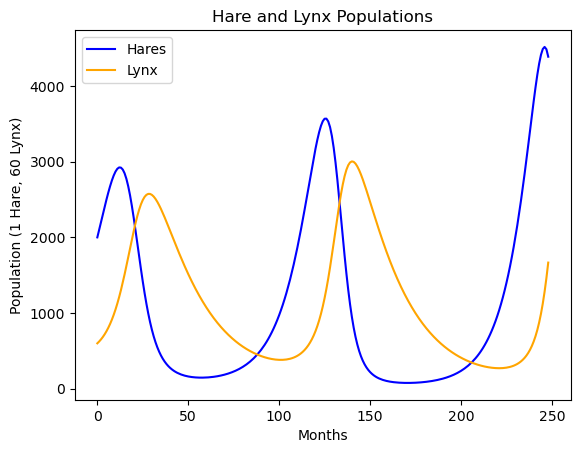

In [2]:
def lynxHare(num_hare, num_lynx, t_final):
    # time variables
    t_initial = 0
    t = t_initial
    # Starting values at the beginning of model for hares and lynx (turns out the plural of lynx is just lynx)
    H = num_hare
    L = num_lynx

    # Hares per month per hare
    a = .1
    # Hares per month per hare-lynx
    b = .005
    # Lynx per month per hare-lynx
    c = .00004
    # Lynx per month per lynx
    d = .04

    # Creating empty arrays to hold values we will plot
    H_graph = []
    L_graph = []

    # Change in time/number of steps
    delta_t = 1
    # Iterating through the number of line segments in our plot (the more lines, the smoother the graph)
    for k in range (1, t_final):
        # Add current values to graph vectors (include Lynx scaling factor of 60)
        H_graph.append(H)
        L_graph.append(60*L)
        # Rate of change in Hare population
        Hprime = a*H - b*H*L
        # Rate of change in Lynx population
        Lprime = c*H*L - d*L
        
        # Actual change in Hare and Lynx populations
        delta_H = Hprime*delta_t
        delta_L = Lprime*delta_t

        #Updating the values of t, H, and L with our delta values
        t = t + delta_t
        H = H + delta_H
        L = L + delta_L

    # return the arrays with values over each step
    return H_graph, L_graph


# Plot the populations
H_line, L_line= lynxHare(2000, 10, 250)
plt.plot(H_line, color='blue', label='Hares')
plt.plot(L_line, color='orange', label='Lynx')
plt.legend(['Hares', 'Lynx'])
plt.xlabel('Months')
plt.ylabel('Population (1 Hare, 60 Lynx)')
plt.title('Hare and Lynx Populations')    

The graph above shows part C of number 7 on p. 193-194 of Calculus in Context, beginning with 2,000 hares and 10 lynx.  It includes the basic assumptions of the two species model:

* In the absence of lynx, the hare population grows logistically - we see this in the equation for Hprime, where if the lynx population is 0 then the hare population is aH 
* The population of hares declines in proportion to to H*L - see this in the second half of the equation for Hprime, -bHL.  Both of these assumptions can be seen in the rise and fall of the blue line, which represents the hare population
* In the absence of hares, the lynx die of proportional to the number of lynx - the equation for Lprime shows that if H is 0, then the lynx decline at a rate of dL (and is demonstrated by the declines in the orange line, which occur following the decline of the blue line representing hares)
* The lynx population increases proportionately to the number of encounters between lynx and hares - this can be seen in the first half of Lprime, cHL where c represents lynx per month per hare-lynx.

The hare-lynx units are especially interesting, as they complicate the model to include not only the populations of predators and prey, but also the encounters between the two (R.I.P. hares).

Below are the graphs for parts D and F of number 7, showing both the hare and lynx populations when L=20 and L=50.  Doubling the lynx population from our initial graph condensed it, but changing it 50 did the opposite, spreading out the population peaks and valleys further over the 250 months.

Text(0.5, 1.0, 'Lynx pop. = 20')

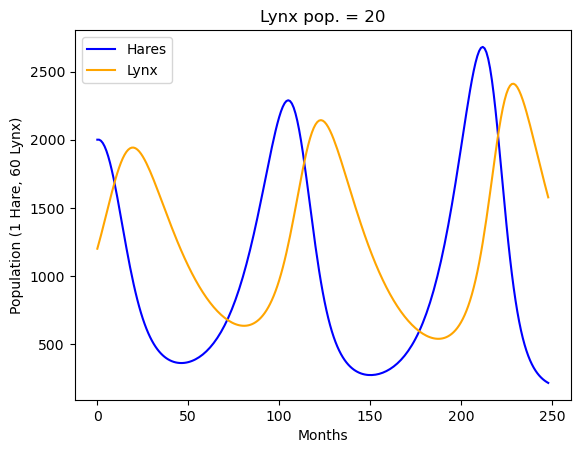

In [3]:
H_line, L_line= lynxHare(2000, 20, 250)
plt.plot(H_line, color='blue', label='Hares')
plt.plot(L_line, color='orange', label='Lynx')
plt.legend(['Hares', 'Lynx'])
plt.xlabel('Months')
plt.ylabel('Population (1 Hare, 60 Lynx)')
plt.title('Lynx pop. = 20') 

Text(0.5, 1.0, 'Lynx pop = 50')

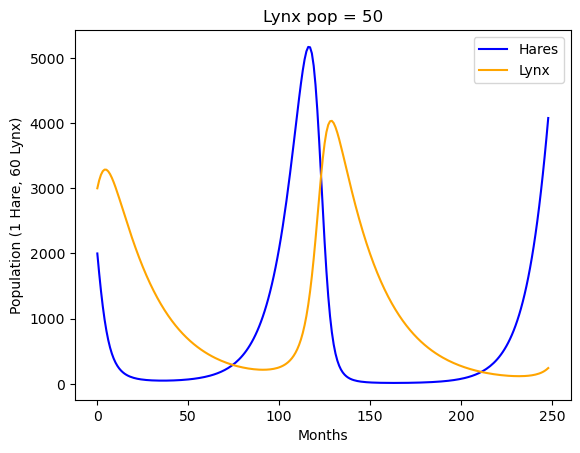

In [4]:
H_line, L_line= lynxHare(2000, 50, 250)
plt.plot(H_line, color='blue', label='Hares')
plt.plot(L_line, color='orange', label='Lynx')
plt.legend(['Hares', 'Lynx'])
plt.xlabel('Months')
plt.ylabel('Population (1 Hare, 60 Lynx)')
plt.title('Lynx pop = 50') 

**Activity One:**
Do all parts of the May Model, 4.1 question 6. 


## May Model

### A)

![desmos1](desmos1.png)

$D(x) = \frac{c x}{x + d}$

models the number of rabbits a single fox eats in a given time period. $c$ is the saturation value, or in plain english the maximum number of rabbits a fox can consume. As $x$ (which is the rabbit population) increases, $D(x)$ approaches $c$, which is shown in my desmos screenshot above. I think this means that there is a limit to the number of rabbits a fox can eat.

$d$ seems to determine how quickly saturation occurs. After playing in Desmos, it looks like smaller values of $d$ mean that foxes reach their consumption limit faster (essentially meaning they have greater efficiency). Larger values of $d$ takes longer for the foxes to reach their maximum consumption rate. My thinking is that the interactions between rabbits and foxes are less frequent or less efficient when $d$ is larger.


### B)

The system of equations follows May’s assumptions:

- **First equation ($x'$):**
    - $a x \left( 1 - \frac{x}{b} \right)$: Rabbits grow logistically, with a maximum population size of $b$
    - $\frac{c x y}{x + d}$: Foxes eat rabbits based on the number of rabbits ($x$), foxes ($y$), and interaction efficiency ($d$)

- **Second equation ($y'$):**
    - $e y \left( 1 - \frac{y}{f x} \right)$: Foxes grow depending on how many rabbits ($x$) are available. If there aren’t enough rabbits, foxes die off.



### C)

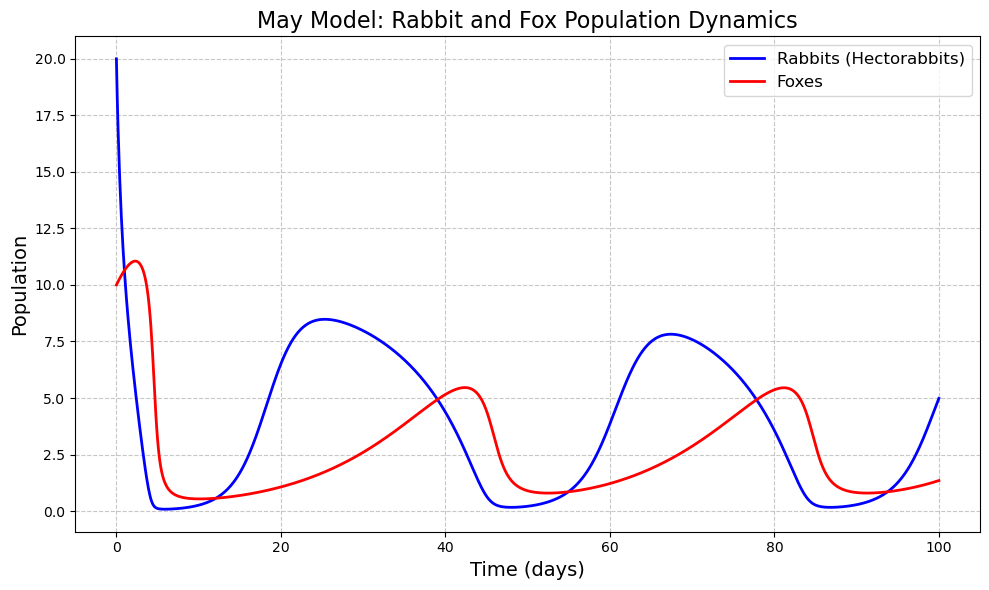

In [5]:
def MayModel(Tinit, Tfinal, R, F, a, b, c, d, e, f, steps):
    # Time step
    dT = (Tfinal - Tinit) / steps
    Tvals = [Tinit]
    Rvals = [R]
    Fvals = [F]
    
    # Loop over the number of steps
    for k in range(1, steps + 1):
        # Compute rate of change of rabbits and foxes
        Rp = a * R * (1 - R / b) - c * R * F / (R + d)
        Fp = e * F * (1 - F / (f * R))
        
        # Update rabbit and fox populations
        dR = Rp * dT
        dF = Fp * dT
        
        # Advance time and update populations
        Tinit += dT
        R += dR
        F += dF
        
        Tvals.append(Tinit)
        Rvals.append(R)
        Fvals.append(F)
    
    plt.figure(figsize=(10, 6))
    plt.plot(Tvals, Rvals, label="Rabbits (Hectorabbits)", color='b', lw=2)
    plt.plot(Tvals, Fvals, label="Foxes", color='r', lw=2)
    
    plt.xlabel("Time (days)", fontsize=14)
    plt.ylabel("Population", fontsize=14)
    plt.title("May Model: Rabbit and Fox Population Dynamics", fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    
    plt.tight_layout()
    plt.show()

# Initial conditions and parameters
Tinit = 0  # Initial time
Tfinal = 100  # Final time
R = 2000 / 100  # Convert rabbits to hectorabbits
F = 10  # Initial fox population

# Parameters
a = 0.6
b = 10
c = 0.5
d = 1
e = 0.1
f = 2
steps = 1000

MayModel(Tinit, Tfinal, R, F, a, b, c, d, e, f, steps)

### D)

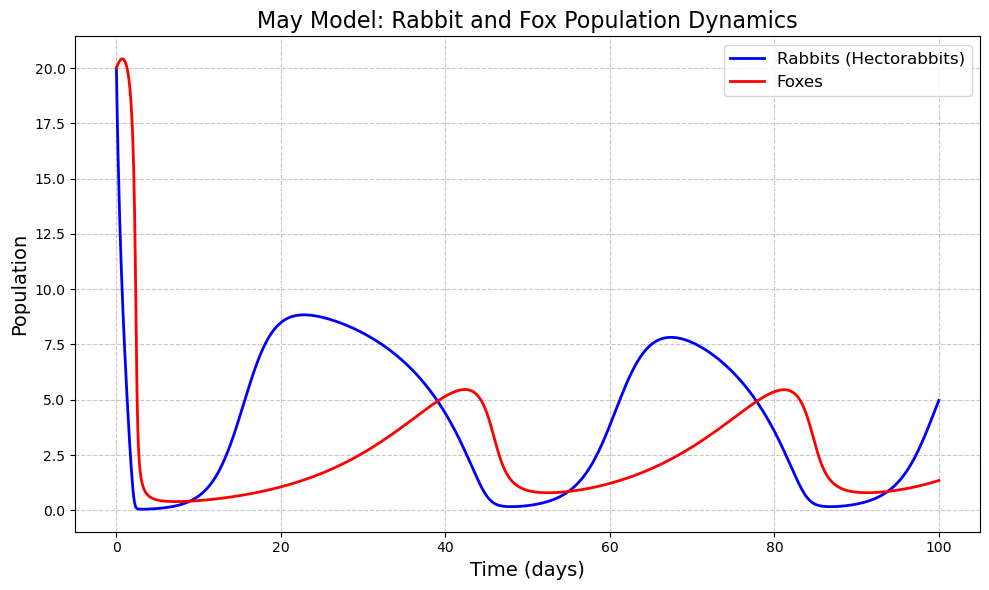

In [6]:
Tinit = 0
Tfinal = 100
R = 2000 / 100
F = 20


a = 0.6
b = 10
c = 0.5
d = 1
e = 0.1
f = 2
steps = 1000

MayModel(Tinit, Tfinal, R, F, a, b, c, d, e, f, steps)

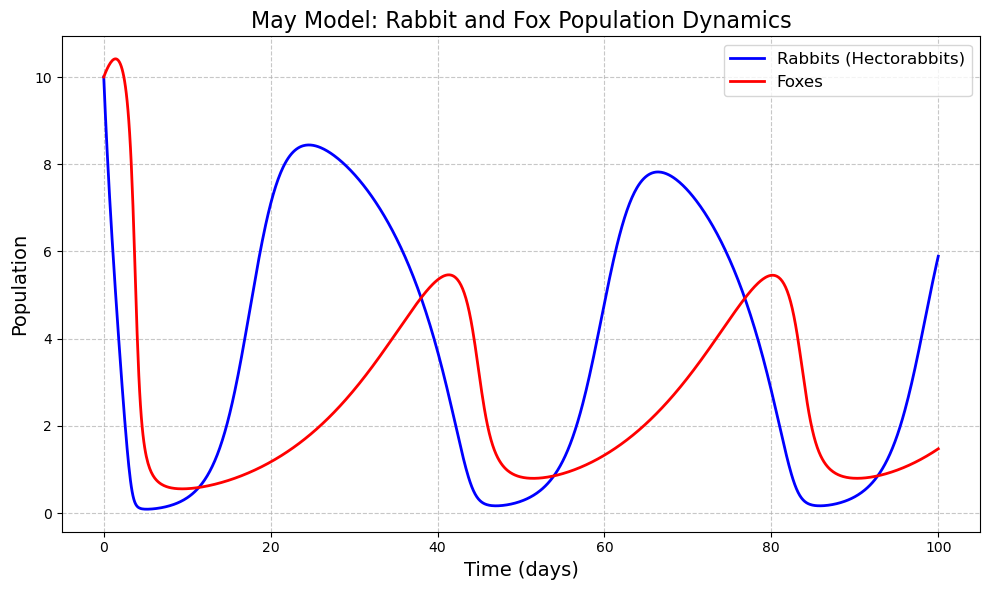

In [7]:
Tinit = 0
Tfinal = 100
R = 1000 / 100
F = 10

a = 0.6
b = 10
c = 0.5
d = 1
e = 0.1
f = 2
steps = 1000

MayModel(Tinit, Tfinal, R, F, a, b, c, d, e, f, steps)

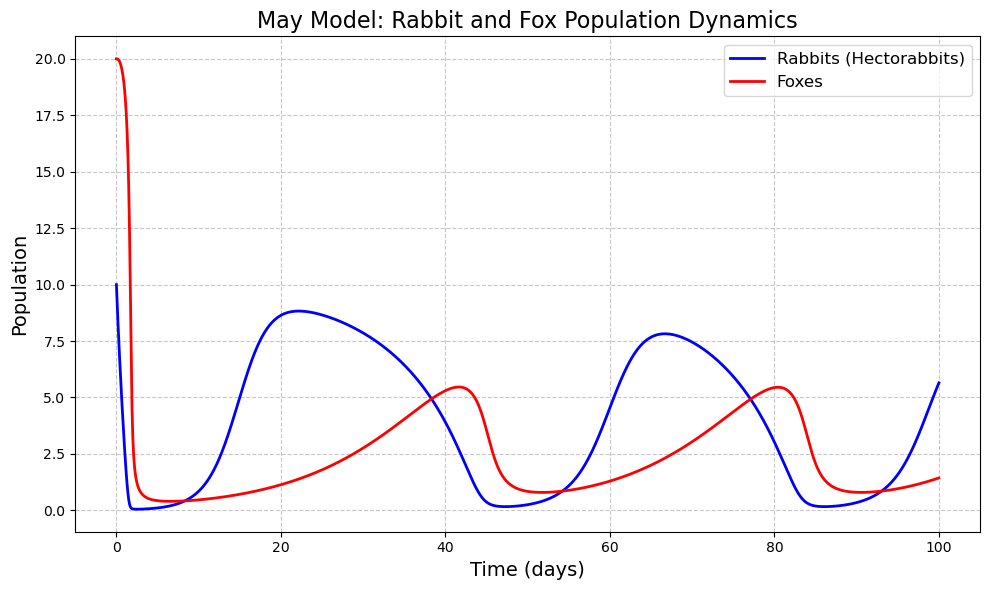

In [8]:
Tinit = 0
Tfinal = 100
R = 1000 / 100
F = 20

a = 0.6
b = 10
c = 0.5
d = 1
e = 0.1
f = 2
steps = 1000

MayModel(Tinit, Tfinal, R, F, a, b, c, d, e, f, steps)

### E)

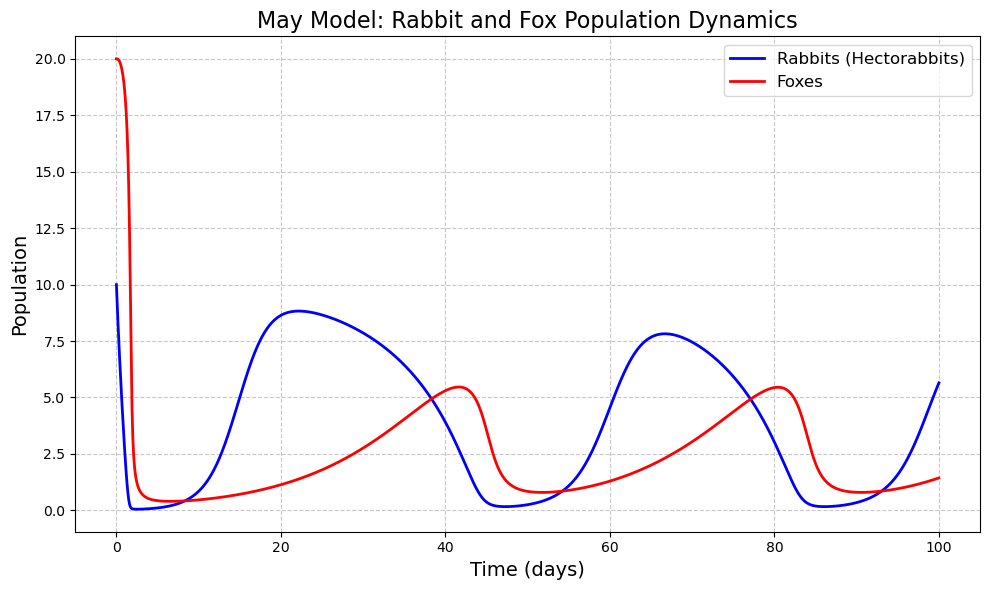

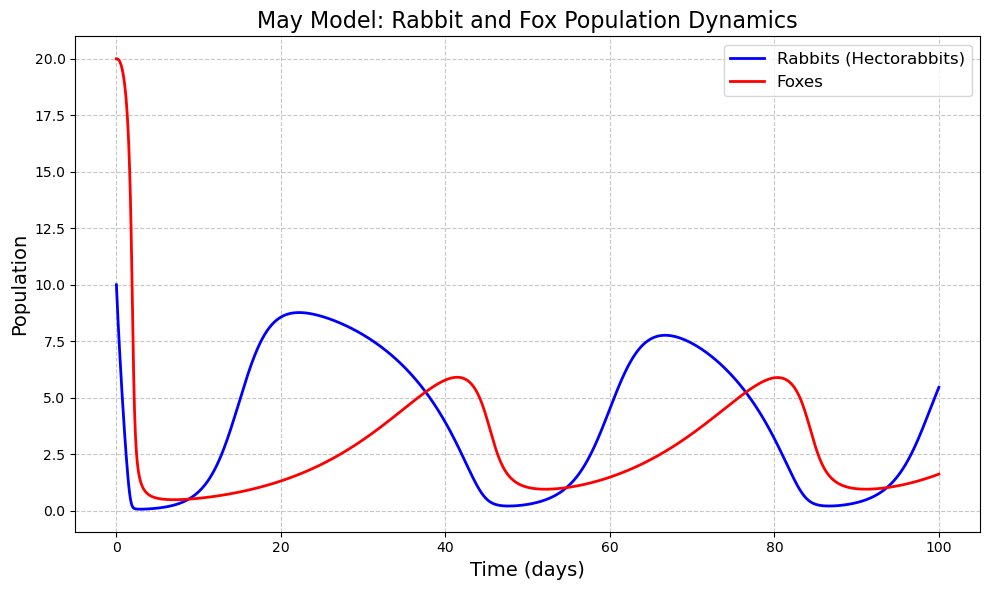

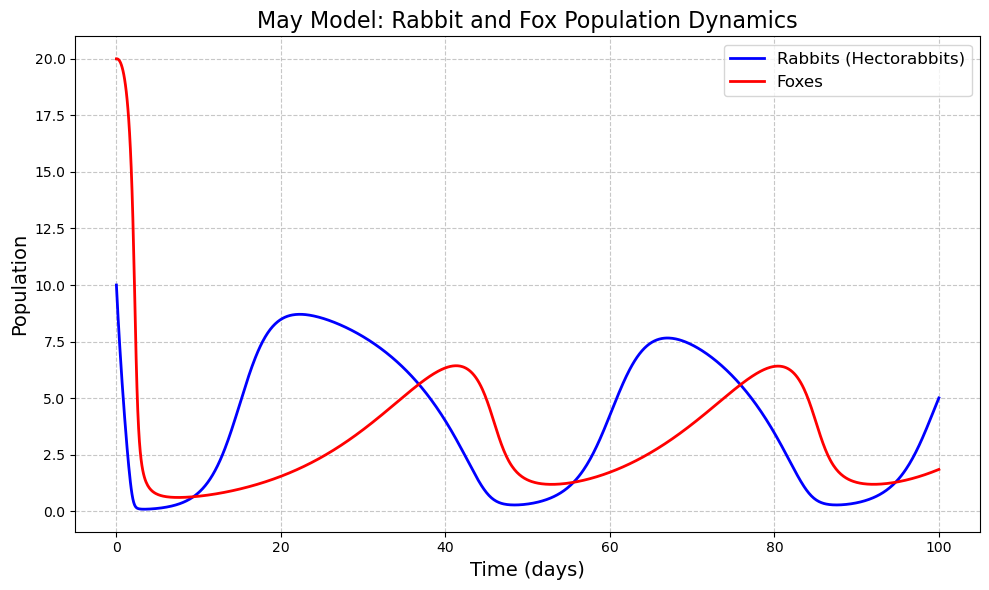

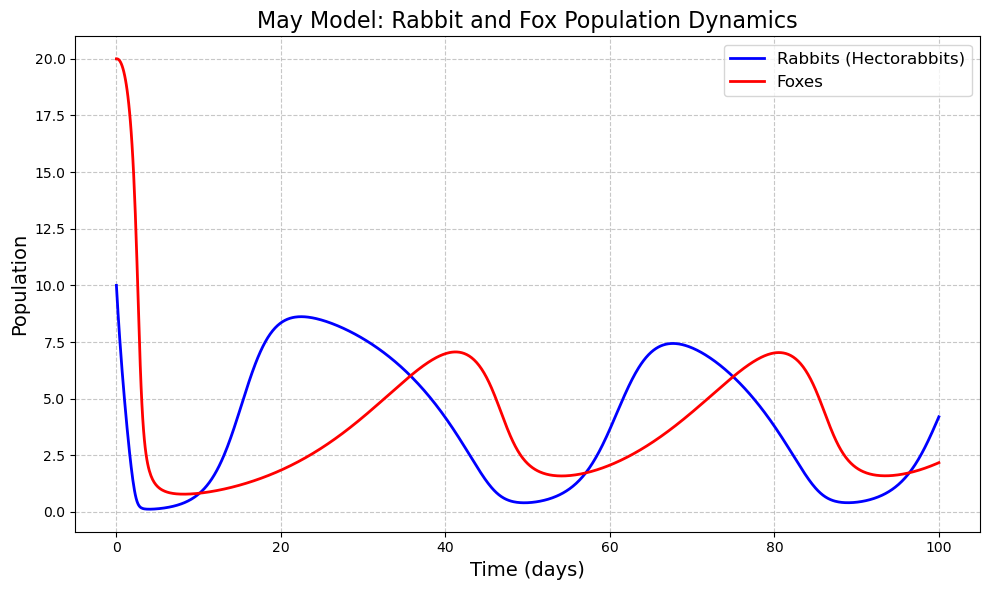

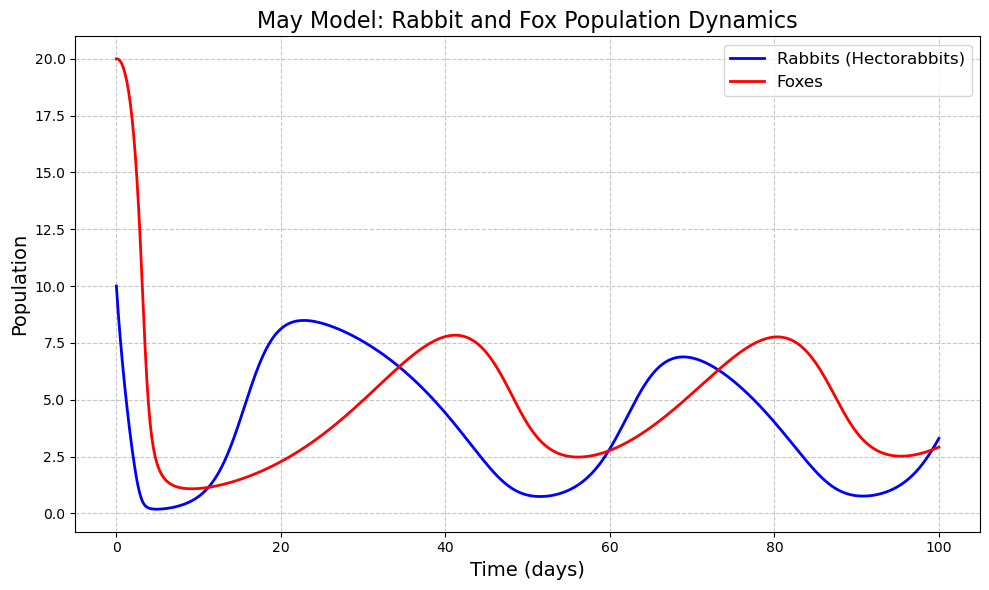

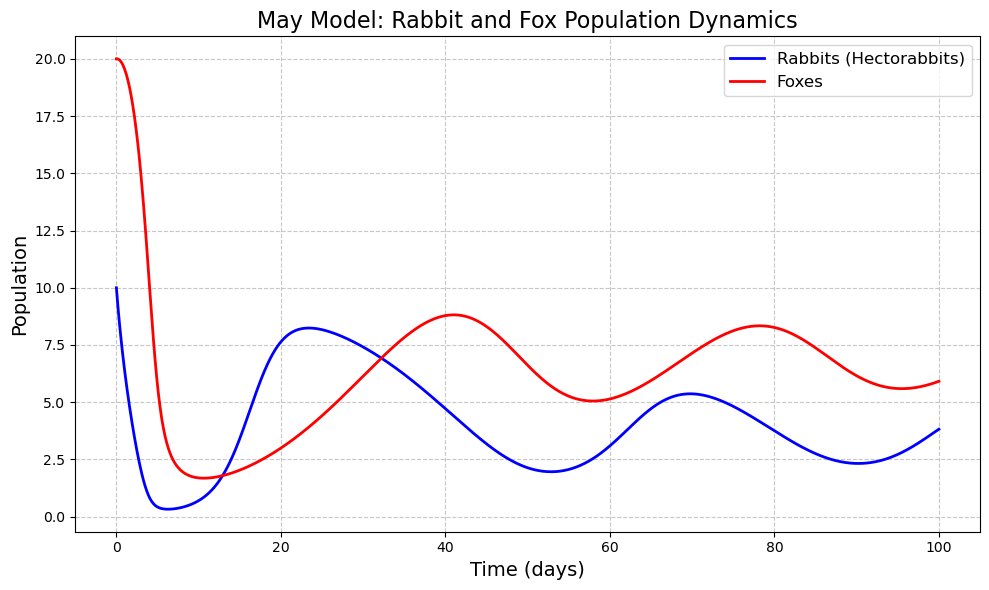

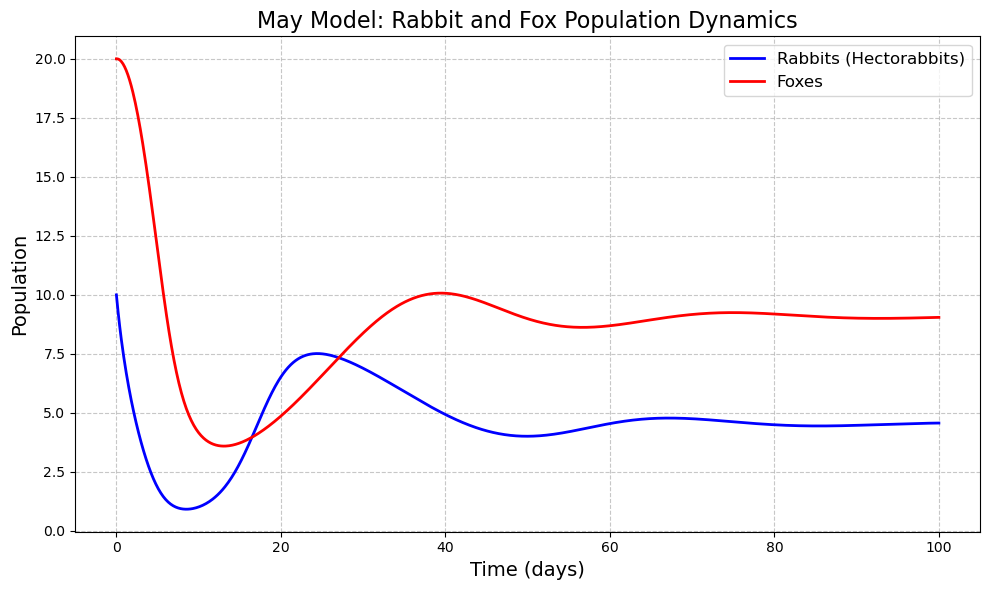

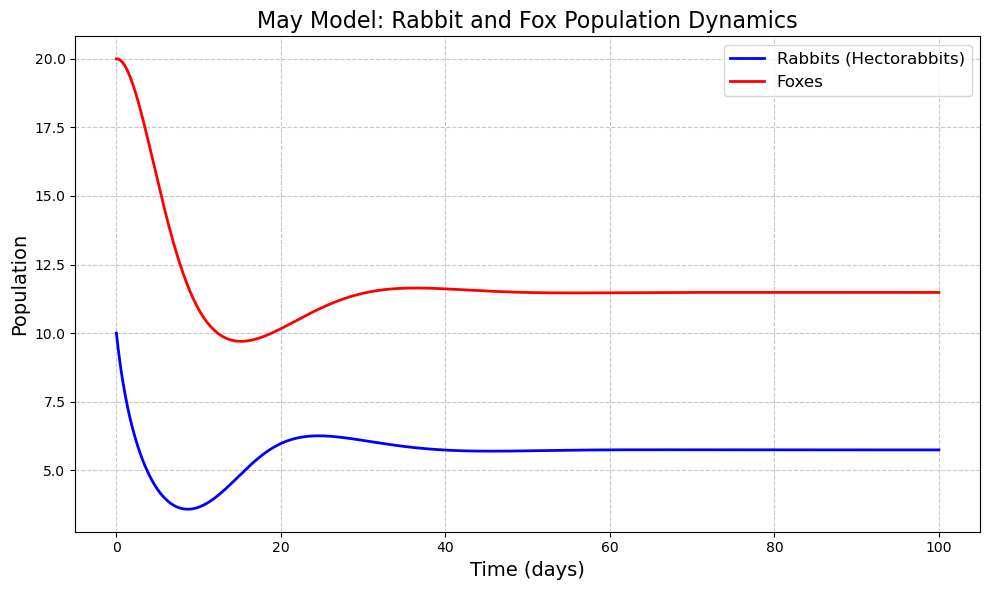

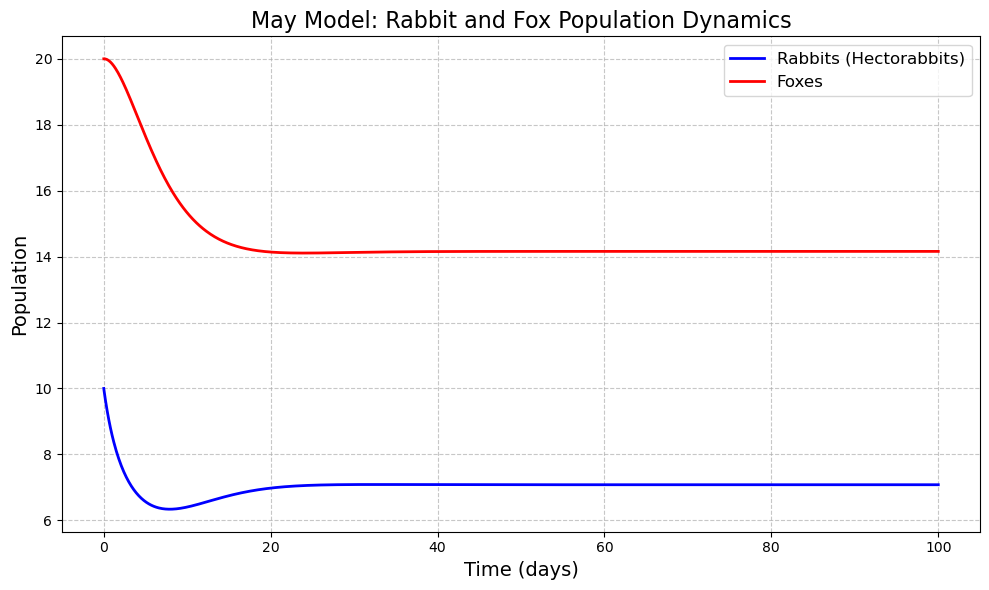

In [9]:
Tinit = 0
Tfinal = 100
R = 1000 / 100
F = 20


a = 0.6
b = 10
c5 = 0.5
c45 = 0.45
c40 = 0.40
c35 = 0.35
c30 = 0.30
c25 = 0.25
c20 = 0.20
c15 = 0.15
c1 = 0.1
d = 1
e = 0.1
f = 2
steps = 1000

MayModel(Tinit, Tfinal, R, F, a, b, c5, d, e, f, steps)
MayModel(Tinit, Tfinal, R, F, a, b, c45, d, e, f, steps)
MayModel(Tinit, Tfinal, R, F, a, b, c40, d, e, f, steps)
MayModel(Tinit, Tfinal, R, F, a, b, c35, d, e, f, steps)
MayModel(Tinit, Tfinal, R, F, a, b, c30, d, e, f, steps)
MayModel(Tinit, Tfinal, R, F, a, b, c25, d, e, f, steps)
MayModel(Tinit, Tfinal, R, F, a, b, c20, d, e, f, steps)
MayModel(Tinit, Tfinal, R, F, a, b, c15, d, e, f, steps)
MayModel(Tinit, Tfinal, R, F, a, b, c1, d, e, f, steps)

It looks like there is a transition, maybe a Hopf Bifurcation, when c = 0.20 and c = 0.15.

**Activity Two:**
Do all parts of 4.1  #8, #9, #10, #11 Fermentation. It's great to discover these equations on your own,however, please check with me and Piazza to make sure you've got them right.

## 8)

### A)
- **Model Type**: Logistic growth of yeast
- **Initial yeast amount**: 0.5 lbs
- **Carrying capacity**: 10 lbs of yeast
- **Growth rate**: 0.2 lbs of yeast per hour per pound of yeast
- **Variable**: $Y(t)$ is the amount of yeast (lbs) at time $t$ (hours)
- **Differential equation**: 

   $$\frac{dY}{dt} = 0.2Y \left(1 - \frac{Y}{10}\right)$$

This equation models the yeast population growth over time with a carrying capacity

### B)

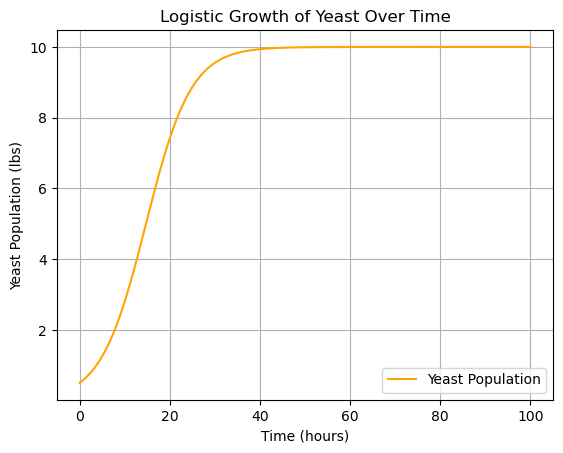

In [11]:
def yeastGrowthLogistic(k, carrying_capacity, Y_initial, t_final, steps):
    # Initialize time variables
    t_initial = 0
    t = t_initial
    delta_t = (t_final - t_initial) / steps
    
    # Initialize yeast amount
    Y = Y_initial
    
    # Create arrays to store results for plotting
    Y_graph = [Y]
    t_graph = [t]
    
    # Iterate through time steps to calculate yeast growth
    while t < t_final:
        # Rate of change based on logistic growth equation
        Yprime = k * Y * (1 - Y / carrying_capacity)
        
        # Update yeast amount and time
        delta_Y = Yprime * delta_t
        Y = Y + delta_Y
        t = t + delta_t
        
        Y_graph.append(Y)
        t_graph.append(t)
    
    return t_graph, Y_graph

# Parameters
k = 0.2  # Growth rate in lbs of yeast per hour, per pound of yeast
carrying_capacity = 10  # Carrying capacity (lbs of yeast)
Y_initial = 0.5  # Initial yeast amount (lbs)
t_final = 100  # Total time (hours)
steps = 10000

time_values, yeast_values = yeastGrowthLogistic(k, carrying_capacity, Y_initial, t_final, steps)

plt.plot(time_values, yeast_values, color='orange', label='Yeast Population')
plt.xlabel('Time (hours)')
plt.ylabel('Yeast Population (lbs)')
plt.title('Logistic Growth of Yeast Over Time')
plt.legend()
plt.grid(True)
plt.show()

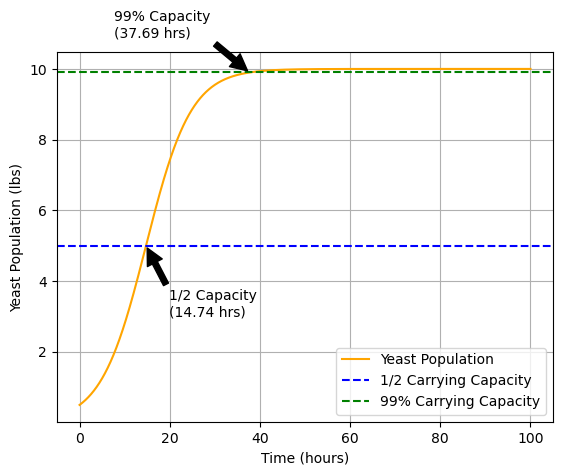

Yeast reaches 1/2 of carrying capacity at 14.74 hours.
Yeast reaches 99% of carrying capacity at 37.69 hours.


In [12]:
k = 0.2
carrying_capacity = 10
Y_initial = 0.5
t_final = 100
steps = 10000

time_values, yeast_values = yeastGrowthLogistic(k, carrying_capacity, Y_initial, t_final, steps)

half_capacity = carrying_capacity / 2
near_capacity = 0.99 * carrying_capacity

time_half_capacity = time_values[np.argmax(np.array(yeast_values) >= half_capacity)]
time_near_capacity = time_values[np.argmax(np.array(yeast_values) >= near_capacity)]

plt.plot(time_values, yeast_values, color='orange', label='Yeast Population')

plt.axhline(y=half_capacity, color='blue', linestyle='--', label='1/2 Carrying Capacity')
plt.axhline(y=near_capacity, color='green', linestyle='--', label='99% Carrying Capacity')

plt.annotate(f"1/2 Capacity\n({time_half_capacity:.2f} hrs)",
             xy=(time_half_capacity, half_capacity), xytext=(time_half_capacity + 5, half_capacity - 2),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate(f"99% Capacity\n({time_near_capacity:.2f} hrs)",
             xy=(time_near_capacity, near_capacity), xytext=(time_near_capacity - 30, near_capacity + 1),
             arrowprops=dict(facecolor='black', shrink=0.05))


plt.xlabel('Time (hours)')
plt.ylabel('Yeast Population (lbs)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Yeast reaches 1/2 of carrying capacity at {time_half_capacity:.2f} hours.")
print(f"Yeast reaches 99% of carrying capacity at {time_near_capacity:.2f} hours.")

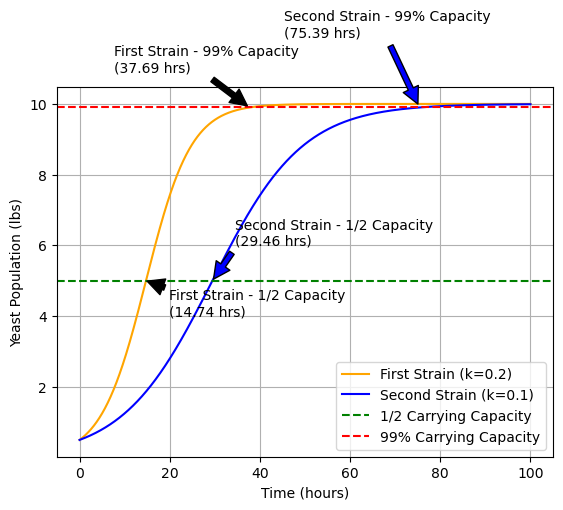

First strain reaches 1/2 capacity at 14.74 hours and 99% capacity at 37.69 hours.
Second strain reaches 1/2 capacity at 29.46 hours and 99% capacity at 75.39 hours.


In [14]:
k1 = 0.2
k2 = 0.1
carrying_capacity = 10
Y_initial = 0.5
t_final = 100
steps = 10000

time_values_1, yeast_values_1 = yeastGrowthLogistic(k1, carrying_capacity, Y_initial, t_final, steps)

time_values_2, yeast_values_2 = yeastGrowthLogistic(k2, carrying_capacity, Y_initial, t_final, steps)

half_capacity = carrying_capacity / 2
near_capacity = 0.99 * carrying_capacity

time_half_capacity_1 = time_values_1[np.argmax(np.array(yeast_values_1) >= half_capacity)]
time_near_capacity_1 = time_values_1[np.argmax(np.array(yeast_values_1) >= near_capacity)]

time_half_capacity_2 = time_values_2[np.argmax(np.array(yeast_values_2) >= half_capacity)]
time_near_capacity_2 = time_values_2[np.argmax(np.array(yeast_values_2) >= near_capacity)]

plt.plot(time_values_1, yeast_values_1, color='orange', label='First Strain (k=0.2)')
plt.plot(time_values_2, yeast_values_2, color='blue', label='Second Strain (k=0.1)')

plt.axhline(y=half_capacity, color='green', linestyle='--', label='1/2 Carrying Capacity')
plt.axhline(y=near_capacity, color='red', linestyle='--', label='99% Carrying Capacity')

plt.annotate(f"First Strain - 1/2 Capacity\n({time_half_capacity_1:.2f} hrs)",
             xy=(time_half_capacity_1, half_capacity), xytext=(time_half_capacity_1 + 5, half_capacity - 1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate(f"First Strain - 99% Capacity\n({time_near_capacity_1:.2f} hrs)",
             xy=(time_near_capacity_1, near_capacity), xytext=(time_near_capacity_1 - 30, near_capacity + 1),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.annotate(f"Second Strain - 1/2 Capacity\n({time_half_capacity_2:.2f} hrs)",
             xy=(time_half_capacity_2, half_capacity), xytext=(time_half_capacity_2 + 5, half_capacity + 1),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.annotate(f"Second Strain - 99% Capacity\n({time_near_capacity_2:.2f} hrs)",
             xy=(time_near_capacity_2, near_capacity), xytext=(time_near_capacity_2 - 30, near_capacity + 2),
             arrowprops=dict(facecolor='blue', shrink=0.05))

plt.xlabel('Time (hours)')
plt.ylabel('Yeast Population (lbs)')
plt.legend()
plt.grid(True)
plt.show()

print(f"First strain reaches 1/2 capacity at {time_half_capacity_1:.2f} hours and 99% capacity at {time_near_capacity_1:.2f} hours.")
print(f"Second strain reaches 1/2 capacity at {time_half_capacity_2:.2f} hours and 99% capacity at {time_near_capacity_2:.2f} hours.")

## 9)
### A)

- **Model Type**: Alcohol production driven by yeast growth
- **Alcohol rate**: 0.05 lbs of alcohol/hour per pound of yeast
- **Variable**: $A(t)$ = amount of alcohol (lbs) at time $t$ (hours)
- **Relation**: Alcohol grows at a rate proportional to yeast $Y(t)$
- **Differential Equation**: 

  $\frac{dA}{dt} = 0.05Y(t)$
  
  
### B)

- **Model Type**: Yeast death due to alcohol toxicity
- **Death rate**: 0.1 lbs of yeast/hour per pound of yeast and alcohol
- **Variables**: $Y(t)$ = yeast (lbs), $A(t)$ = alcohol (lbs)
- **Modified Logistic Growth**: Yeast death is proportional to $Y \times A$
- **Differential Equation**: 

  $\frac{dY}{dt} = kY \left(1 - \frac{Y}{K}\right) - 0.1Y \times A$

### C)

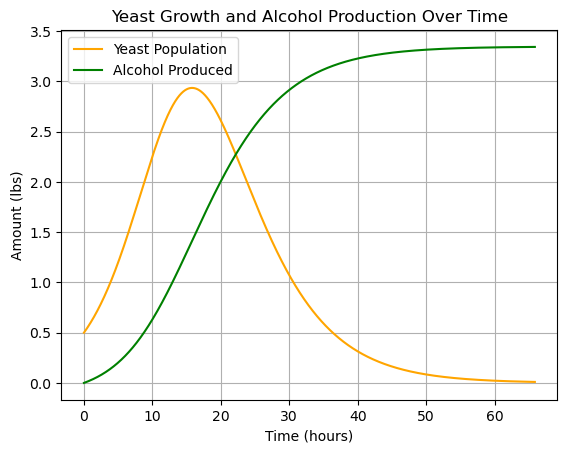

Fermentation ends at 65.88 hours.
Alcohol produced by this time: 3.34 lbs.


In [15]:
import numpy as np
import matplotlib.pyplot as plt

def yeastAlcoholGrowth(k, carrying_capacity, p, tl, Y_initial, A_initial, t_final, steps):
    # Initialize time variables
    t_initial = 0
    t = t_initial
    delta_t = (t_final - t_initial) / steps
    
    # Initialize yeast and alcohol amounts
    Y = Y_initial
    A = A_initial
    
    # Create arrays to store results for plotting
    Y_graph = [Y]
    A_graph = [A]
    t_graph = [t]
    
    # Iterate through time steps to calculate yeast and alcohol growth
    while t < t_final:
        # Rate of change for yeast based on logistic growth and alcohol toxicity
        Yprime = k * Y * (1 - Y / carrying_capacity) - tl * Y * A
        
        # Rate of change for alcohol based on yeast population
        Aprime = p * Y
        
        # Update yeast and alcohol amounts and time
        delta_Y = Yprime * delta_t
        delta_A = Aprime * delta_t
        Y = Y + delta_Y
        A = A + delta_A
        t = t + delta_t
        
        Y_graph.append(Y)
        A_graph.append(A)
        t_graph.append(t)
        
        # End the simulation if yeast population is below the threshold (fermentation ends)
        if Y <= 0.01:
            break
    
    return t_graph, Y_graph, A_graph

# Parameters
k = 0.2  # Growth rate in lbs of yeast per hour, per pound of yeast
carrying_capacity = 10  # Carrying capacity (lbs of yeast)
p = 0.05  # Alcohol production rate per lb of yeast
tl = 0.1  # Toxic effect of alcohol on yeast (rate at which yeast dies per lb of alcohol)
Y_initial = 0.5  # Initial yeast amount (lbs)
A_initial = 0  # Initial alcohol amount (lbs)
t_final = 100  # Total time (hours)
steps = 10000

time_values, yeast_values, alcohol_values = yeastAlcoholGrowth(k, carrying_capacity, p, tl, Y_initial, A_initial, t_final, steps)

plt.plot(time_values, yeast_values, color='orange', label='Yeast Population')
plt.plot(time_values, alcohol_values, color='green', label='Alcohol Produced')

plt.xlabel('Time (hours)')
plt.ylabel('Amount (lbs)')
plt.title('Yeast Growth and Alcohol Production Over Time')
plt.legend()
plt.grid(True)
plt.show()

if yeast_values[-1] <= 0.01:
    fermentation_end_time = time_values[-1]
    final_alcohol_amount = alcohol_values[-1]
    print(f"Fermentation ends at {fermentation_end_time:.2f} hours.")
    print(f"Alcohol produced by this time: {final_alcohol_amount:.2f} lbs.")
else:
    print("Fermentation did not end within the given time.")

## 10)

In [16]:
# Parameters
k = 0.2  # Growth rate in lbs of yeast per hour, per pound of yeast
carrying_capacity = 10  # Carrying capacity (lbs of yeast)
Y_initial = 0.5  # Initial yeast amount (lbs)
A_initial = 0  # Initial alcohol amount (lbs)
t_final = 100  # Total time (hours)
steps = 10000  # Number of steps for the simulation

# Scenario 1: Increased alcohol production and decreased toxicity
p1 = 0.25  # Alcohol production rate increased
tl1 = 0.02  # Toxicity rate decreased
time_values_1, yeast_values_1, alcohol_values_1 = yeastAlcoholGrowth(k, carrying_capacity, p1, tl1, Y_initial, A_initial, t_final, steps)

# Get final time and alcohol amount when fermentation ends
fermentation_end_time_1 = time_values_1[-1]
final_alcohol_amount_1 = alcohol_values_1[-1]

print(f"Scenario 1 (Increased alcohol production and decreased toxicity):")
print(f"Fermentation ends at {fermentation_end_time_1:.2f} hours.")
print(f"Final amount of alcohol produced: {final_alcohol_amount_1:.2f} lbs.\n")

# Scenario 2: Only increased alcohol production
p2 = 0.25  # Alcohol production rate increased
tl2 = 0.1  # Toxicity remains unchanged
time_values_2, yeast_values_2, alcohol_values_2 = yeastAlcoholGrowth(k, carrying_capacity, p2, tl2, Y_initial, A_initial, t_final, steps)

fermentation_end_time_2 = time_values_2[-1]
final_alcohol_amount_2 = alcohol_values_2[-1]

print(f"Scenario 2 (Increased alcohol production only):")
print(f"Fermentation ends at {fermentation_end_time_2:.2f} hours.")
print(f"Final amount of alcohol produced: {final_alcohol_amount_2:.2f} lbs.\n")

# Scenario 3: Only decreased toxicity
p3 = 0.05  # Alcohol production rate unchanged
tl3 = 0.02  # Toxicity rate decreased
time_values_3, yeast_values_3, alcohol_values_3 = yeastAlcoholGrowth(k, carrying_capacity, p3, tl3, Y_initial, A_initial, t_final, steps)

fermentation_end_time_3 = time_values_3[-1]
final_alcohol_amount_3 = alcohol_values_3[-1]

print(f"Scenario 3 (Decreased toxicity only):")
print(f"Fermentation ends at {fermentation_end_time_3:.2f} hours.")
print(f"Final amount of alcohol produced: {final_alcohol_amount_3:.2f} lbs.\n")

# Scenario 4: Original rates (for comparison)
p4 = 0.05  # Original alcohol production rate
tl4 = 0.1  # Original toxicity rate
time_values_4, yeast_values_4, alcohol_values_4 = yeastAlcoholGrowth(k, carrying_capacity, p4, tl4, Y_initial, A_initial, t_final, steps)

fermentation_end_time_4 = time_values_4[-1]
final_alcohol_amount_4 = alcohol_values_4[-1]

print(f"Scenario 4 (Original rates for comparison):")
print(f"Fermentation ends at {fermentation_end_time_4:.2f} hours.")
print(f"Final amount of alcohol produced: {final_alcohol_amount_4:.2f} lbs.")


Scenario 1 (Increased alcohol production and decreased toxicity):
Fermentation ends at 65.88 hours.
Final amount of alcohol produced: 16.71 lbs.

Scenario 2 (Increased alcohol production only):
Fermentation ends at 34.74 hours.
Final amount of alcohol produced: 4.24 lbs.

Scenario 3 (Decreased toxicity only):
Fermentation ends at 100.00 hours.
Final amount of alcohol produced: 12.18 lbs.

Scenario 4 (Original rates for comparison):
Fermentation ends at 65.88 hours.
Final amount of alcohol produced: 3.34 lbs.


## 11)

### A)
- **Model Type**: Sugar consumption by yeast
- **Consumption rate**: 0.15 lbs of sugar/hour per pound of yeast
- **Variables**: $S(t)$ = sugar (lbs), $Y(t)$ = yeast (lbs)
- **Relation**: Sugar consumption is proportional to the amount of yeast $Y(t)$
- **Differential Equation**:

  $\frac{dS}{dt} = -0.15 \times Y(t)$

### B)

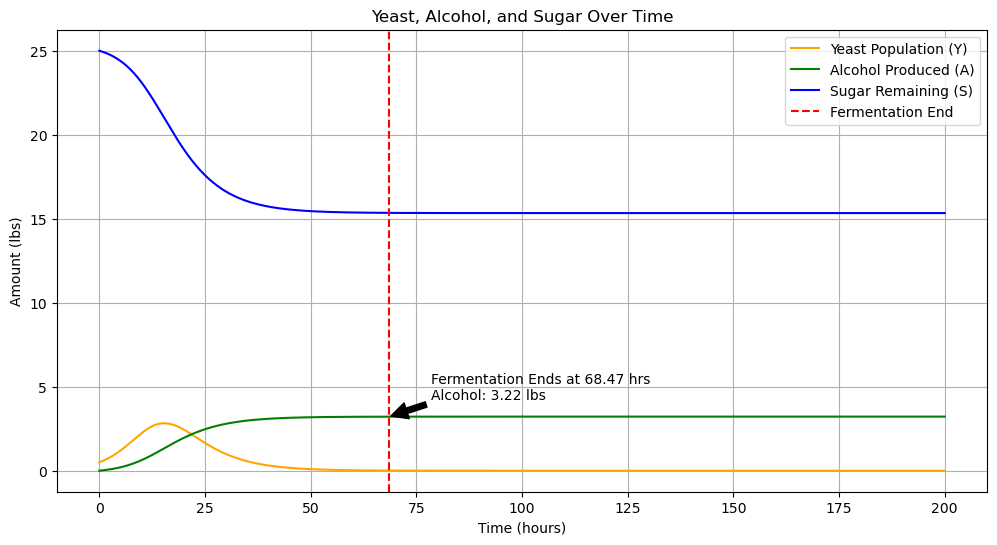

Fermentation ends at 68.47 hours.
At this time, the amount of alcohol produced is approximately 3.22 lbs.


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Function for yeast-alcohol-sugar system
def yeast_alcohol_sugar_system(t, Z):
    Y, A, S = Z
    K = 0.4 * S  # Carrying capacity as a function of sugar
    r = 0.2  # Growth rate of yeast
    alpha = 0.1  # Toxicity effect (alcohol killing yeast)
    beta = 0.05  # Alcohol production rate per yeast
    gamma = 0.15  # Sugar consumption rate per yeast
    
    # Differential equations
    dYdt = r * Y * (1 - Y / K) - alpha * Y * A
    dAdt = beta * Y
    dSdt = -gamma * Y
    return [dYdt, dAdt, dSdt]

# Initial conditions
Y0 = 0.5  # Initial yeast population in pounds
A0 = 0    # Initial alcohol amount in pounds
S0 = 25   # Initial sugar amount in pounds
initial_conditions = [Y0, A0, S0]

# Time span and evaluation points
t_span = (0, 200)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solving the system of differential equations
solution = solve_ivp(yeast_alcohol_sugar_system, t_span, initial_conditions, t_eval=t_eval, method='RK45')

# Extracting results
Y_values = solution.y[0]
A_values = solution.y[1]
S_values = solution.y[2]
t_values = solution.t

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(t_values, Y_values, label='Yeast Population (Y)', color='orange')
plt.plot(t_values, A_values, label='Alcohol Produced (A)', color='green')
plt.plot(t_values, S_values, label='Sugar Remaining (S)', color='blue')

# Mark fermentation end (when Y <= 0.01 lbs)
fermentation_end_time = t_values[np.argmax(Y_values <= 0.01)]
end_alcohol_amount = A_values[np.argmax(Y_values <= 0.01)]
plt.axvline(x=fermentation_end_time, color='red', linestyle='--', label='Fermentation End')

# Annotating fermentation end
plt.annotate(f'Fermentation Ends at {fermentation_end_time:.2f} hrs\nAlcohol: {end_alcohol_amount:.2f} lbs',
             xy=(fermentation_end_time, end_alcohol_amount), 
             xytext=(fermentation_end_time + 10, end_alcohol_amount + 1),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Final plot settings
plt.title('Yeast, Alcohol, and Sugar Over Time')
plt.xlabel('Time (hours)')
plt.ylabel('Amount (lbs)')
plt.legend()
plt.grid(True)
plt.show()

# Print results
print(f"Fermentation ends at {fermentation_end_time:.2f} hours.")
print(f"At this time, the amount of alcohol produced is approximately {end_alcohol_amount:.2f} lbs.")



### C)

Fermentation ends at 68.47 hours.
Remaining sugar at the end: 15.35 lbs.
Alcohol produced by this time: 3.22 lbs.


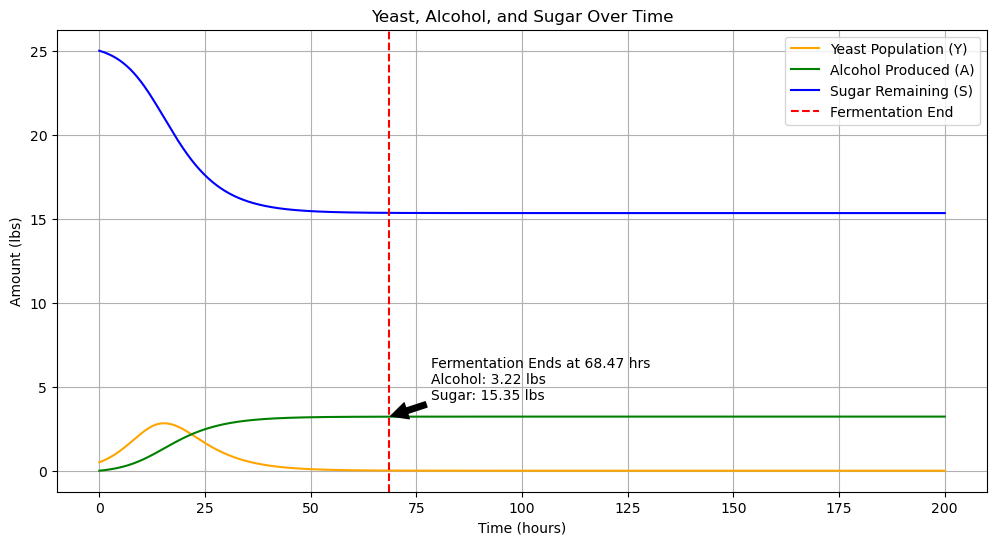

In [18]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the system of differential equations
def yeast_alcohol_sugar_system(t, Z):
    Y, A, S = Z
    K = 0.4 * S  # Carrying capacity based on sugar
    r = 0.2  # Growth rate of yeast
    alpha = 0.1  # Toxicity effect (alcohol killing yeast)
    beta = 0.05  # Alcohol production rate per yeast
    gamma = 0.15  # Sugar consumption rate per yeast
    
    # Differential equations
    dYdt = r * Y * (1 - Y / K) - alpha * Y * A
    dAdt = beta * Y
    dSdt = -gamma * Y
    return [dYdt, dAdt, dSdt]

# Initial conditions
Y0 = 0.5  # Initial yeast population in pounds
A0 = 0    # Initial alcohol amount in pounds
S0 = 25   # Initial sugar amount in pounds
initial_conditions = [Y0, A0, S0]

# Time span and evaluation points
t_span = (0, 200)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the system of differential equations
solution = solve_ivp(yeast_alcohol_sugar_system, t_span, initial_conditions, t_eval=t_eval, method='RK45')

# Extracting results
Y_values = solution.y[0]
A_values = solution.y[1]
S_values = solution.y[2]
t_values = solution.t

# Find when yeast drops to 0.01 lbs
fermentation_end_time = t_values[np.argmax(Y_values <= 0.01)]
remaining_sugar = S_values[np.argmax(Y_values <= 0.01)]
alcohol_produced = A_values[np.argmax(Y_values <= 0.01)]

# Print results
print(f"Fermentation ends at {fermentation_end_time:.2f} hours.")
print(f"Remaining sugar at the end: {remaining_sugar:.2f} lbs.")
print(f"Alcohol produced by this time: {alcohol_produced:.2f} lbs.")

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(t_values, Y_values, label='Yeast Population (Y)', color='orange')
plt.plot(t_values, A_values, label='Alcohol Produced (A)', color='green')
plt.plot(t_values, S_values, label='Sugar Remaining (S)', color='blue')

# Mark fermentation end (when Y <= 0.01 lbs)
plt.axvline(x=fermentation_end_time, color='red', linestyle='--', label='Fermentation End')

# Annotate fermentation end
plt.annotate(f'Fermentation Ends at {fermentation_end_time:.2f} hrs\nAlcohol: {alcohol_produced:.2f} lbs\nSugar: {remaining_sugar:.2f} lbs',
             xy=(fermentation_end_time, alcohol_produced), 
             xytext=(fermentation_end_time + 10, alcohol_produced + 1),
             arrowprops=dict(facecolor='black', shrink=0.05))

# Final plot settings
plt.title('Yeast, Alcohol, and Sugar Over Time')
plt.xlabel('Time (hours)')
plt.ylabel('Amount (lbs)')
plt.legend()
plt.grid(True)
plt.show()


**Activity Three:**
Choose any of the models from the book to expand upon and develop. This does not have to be super complex, please scale it to the time you have available.
+ The simple Lotka-Volterra model from #7 is easy to expand to a complex ecosystem with MANY equations (mice, foxes, bears, aliens, and can accomodate a Zombie Apocolypse)
+ Expand SIR, add complexities with immunity, other diseases (try Chicken Pox and Shingles together),add deaths, more variables, or compare various epidemic responses.
+ Check out the examples in 4.1 #12-#14(Newton's Cooling, can you see applications to crime scene investigations?)
+ Check out 4.1 #19-#24 from more ideas
+ If you did this activity in Linear Algebra and/or want a challenge, look up research papers about modeling with differential equations and try to reproduce the model - this could be a start for a final project.

# Expansion of Lotka-Volterra Model

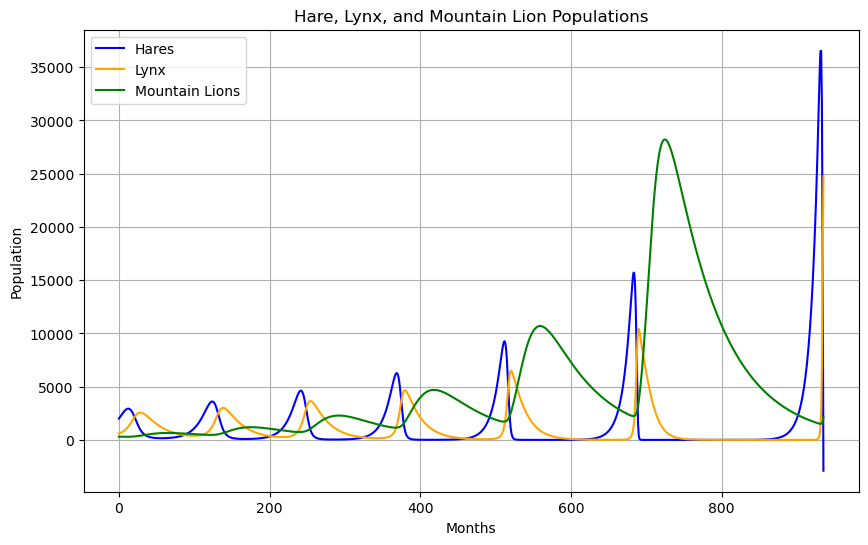

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def lynxHareMountainLion(num_hare, num_lynx, num_lion, t_final):
    t_initial = 0
    t = t_initial
    H = num_hare
    L = num_lynx
    M = num_lion

    # Coefficients for my model
    a = .1     # Hare birth rate
    b = .005   # Hare-lynx interaction rate
    c = .00004 # Lynx reproduction rate per hare
    d = .04    # Lynx death rate
    h = .0001  # Rare lynx-lion interaction rate (small value)
    m = .001   # Mountain lion growth rate from hunting lynx
    n = .015   # Lion death rate

    H_graph = []
    L_graph = []
    M_graph = []

    delta_t = 1

    for k in range(1, t_final):
        H_graph.append(H)
        L_graph.append(60*L)
        M_graph.append(60*M)

        if H < 0 or L < 0 or M < 0:
            print(f"Warning: Negative population at time {k} months!")
            break
        
        Hprime = a*H - b*H*L   # Hares only interact with lynx
        Lprime = c*H*L - d*L - h*L*M  # Lynx are affected by hares and mountain lions
        Mprime = m*L*M - n*M   # Mountain lions only interact with lynx

        delta_H = Hprime * delta_t
        delta_L = Lprime * delta_t
        delta_M = Mprime * delta_t

        H = H + delta_H
        L = L + delta_L
        M = M + delta_M

    return H_graph, L_graph, M_graph

# Initial populations: 2000 hares, 10 lynx, 5 mountain lions
H_line, L_line, M_line = lynxHareMountainLion(2000, 10, 5, 10000)

plt.figure(figsize=(10, 6))
plt.plot(H_line, color='blue', label='Hares')
plt.plot(L_line, color='orange', label='Lynx')
plt.plot(M_line, color='green', label='Mountain Lions')
plt.legend(['Hares', 'Lynx', 'Mountain Lions'])
plt.xlabel('Months')
plt.ylabel('Population')
plt.title('Hare, Lynx, and Mountain Lion Populations')
plt.grid(True)
plt.show()

For this problem, I decided to update the Lotka-Voltera Two Species Model and introduce a third species. See my equations below: 

#### Hares (H):

$$
H' = aH - bHL
$$

Where:
- $(a)$: birth rate of hares.
- $(b)$: hare-lynx interaction rate.

#### Lynx (L):

$$
L' = cHL - dL - hLM
$$

Where:
- $(c)$: lynx growth rate from hunting hares.
- $(d)$: death rate of lynx.
- $(h)$: rare lynx-mountain lion interaction rate (set to a small value).

#### Mountain Lions (M):

$$M' = mLM - nM
$$

Where:
- $(m)$: mountain lion growth rate from hunting lynx.
- $(n)$: death rate of mountain lions in the absence of lynx.
